# Dataset: Imóveis em Boston

O objetivo deste notebook é 
- demonstrar uma leitura e análise inicial de um dataset visando
- encontrar eventuais inconsistências e 
- pré processá-lo para tornar mais adaptado ao uso de treinamento de uma rede neural.

Os dados processados são salvos em arquivo para ser lido posteriormente.

## Importação

In [1]:
%matplotlib inline
import matplotlib.pyplot as plot
import os
from IPython.display import display

import numpy as np
import pandas as pd

## Obtendo os dados

In [2]:
# --------------------------------------------------------------------------------
# Boston Housing Data Set
# -----------------------
# [https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
# --------------------------------------------------------------------------------

In [5]:
data = np.load('boston_housing.npz')
Xtra, ytra = data['x'],data['y']
print(Xtra.shape, ytra.shape)

(506, 13) (506,)


## Visualizando com pandas

In [6]:
Xpd, ypd = pd.DataFrame(Xtra), pd.DataFrame(ytra)
display(Xpd.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
display(ypd.head())

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Visualizando distribuição dos atributos via boxplot

In [8]:
import seaborn as sns
sns.boxplot(data=Xtra);

ModuleNotFoundError: No module named 'seaborn'

## Normalizando os dados

Normaliza-se os dados para média zero e variância 1 por característica.

In [9]:
Xtra= Xtra.astype(np.float32)
ytra= ytra.reshape(-1, 1).astype(np.float32)

mean = Xtra.mean(axis=0)
Xtra -= mean
std = Xtra.std(axis=0)
Xtra /= std

n_samples, n_atributes = Xtra.shape
print('Shapes:', Xtra.shape, Xtra.dtype, ytra.shape, ytra.dtype)
print('Data: min={:.3f}, mean={:.3f}, max={:.3f}, std={:.3f}'.format(Xtra.min(), Xtra.mean(), Xtra.max(), Xtra.std()))
print('Target: min={:.3f}, mean={:.3f}, max={:.3f}, std={:.3f}'.format(ytra.min(), ytra.mean(), ytra.max(), ytra.std()))


Shapes: (506, 13) float32 (506, 1) float32
Data: min=-3.907, mean=-0.000, max=9.934, std=1.000
Target: min=5.000, mean=22.533, max=50.000, std=9.188


### Visualizando os dados normalizados com boxplot

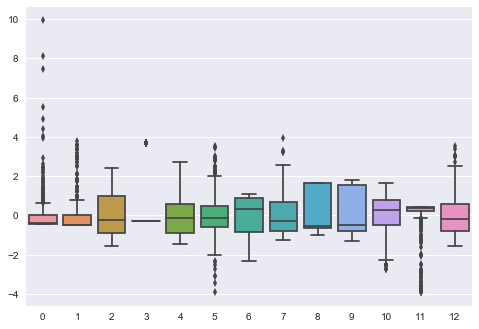

In [8]:
sns.boxplot(data=Xtra)

## Organização dos dados

Os dados de treinamento estão organizados em matrizes onde as linhas representam as amostras e as colunas os atributos. Neste exemplo a matriz X tem 404 linhas (amostras) e 13 colunas (atributos), de 0 a 12. Já a matriz alvo possui uma coluna e 404 linhas.

In [9]:
print('Treinamento:',Xtra.shape, ytra.shape)

Treinamento: (506, 13) (506, 1)


\begin{align*} 
\mathbf{X}_{train} & = \begin{bmatrix}
\longleftarrow & (\mathbf{x}^{(0)})^T & \longrightarrow \\ 
\longleftarrow & (\mathbf{x}^{(1)})^T & \longrightarrow \\ 
  & \vdots  & \\ 
\longleftarrow & (\mathbf{x}^{(m-1)})^T & \longrightarrow 
\end{bmatrix} = \begin{bmatrix}
x_0^{(0)} & x_1^{(0)} & x_2^{(0)} & \ldots & x_{11}^{(0)} \\
x_0^{(1)} & x_1^{(1)} & x_2^{(1)} & \ldots & x_{11}^{(1)} \\
 &  & \vdots  & \\ 
x_0^{(403)} & x_1^{(403)} & x_2^{(403)} & \ldots & x_{11}^{(403)}
\end{bmatrix} \\
\\
\mathbf{y}_{train} & = \begin{bmatrix}
y^{(0)} \\
y^{(1)} \\
\vdots  \\ 
y^{(403)} \\
\end{bmatrix}
\end{align*}


## Salvando os dados no diretório data para uso futuro

Utiliza-se a função `savez` para salvar vários arrays do NumPy num único arquivo, para posterior leitura.

In [10]:
os.makedirs('../data/',exist_ok=True)
np.savez('../data/boston_housing_normalize', Xtra=Xtra, ytra=ytra)

## Testando a leitura

In [11]:
data = np.load('../data/boston_housing_normalize.npz')
data.keys()

['Xtra', 'ytra']

In [12]:
Xtra_n, ytra_n = data['Xtra'], data['ytra']
np.array_equal(Xtra_n,Xtra) 

True

## Regressão Linear

Vamos calcular uma regressão linear simples, para termos uma ideia do valor do custo. 

$$ \mathbf{\hat{y}} = \mathbf{X} \cdot \mathbf{W} $$

Utilizamos a *equação normal* para calcular os pesos:

$$  \mathbf{W} =(\mathbf{X}^T \mathbf{X})^{−1}\mathbf{X}^T \mathbf{y} $$

O MSE (Mean Square Error) - Erro médio quadrático é dado pela média do erro quadrático $E^2$: 

$$ E^2 = (\mathbf{\hat{y}} - \mathbf{y})^2 $$

In [13]:
W = np.linalg.inv((Xtra.T).dot(Xtra)).dot(Xtra.T).dot(ytra)

mse_train = np.mean(np.square(np.dot(Xtra, W) - ytra))

print('MSE train: {:.3f}'.format(mse_train))

MSE train: 529.620


# Exercício

1. Depois de normalizado, divida os dados em 80% para conjunto de 
treinamento e 20% para conjunto de validação e salve os dois conjuntos no
arquivo '../data/boston_housing_normalize_tra_val.npz'

# Aprendizados
